In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
# import yfinance as yf
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.stats.api as sms
from datetime import datetime
from statsmodels.compat import lzip
from DATA import read_power_data
from DATA import calculate_capture_factors
from DATA import calculate_volatility
from DATA import filter_dates_by_interval
from DATA import fixed_effect_model
from DATA import analyze_power_data

### Daily 

In [3]:
analyze_power_data(frequency='daily', interval_start=-1.0, interval_end=1.0, date=pd.Timestamp(2024, 1, 1), FE='year')

C:\Users\Bruger\anaconda3\ASEM\Energy-Economics\DATA.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  capture_factors['Date'] = pd.to_datetime(capture_factors['Date'])


Ljung-Box test statistic:        lb_stat     lb_pvalue
1    65.903071  4.736530e-16
2    93.697145  4.507373e-21
3    94.183085  2.766109e-20
4    96.065814  6.761781e-20
5   106.593564  2.148233e-21
6   107.727568  6.094551e-21
7   143.606576  8.916283e-28
8   144.886854  2.281238e-27
9   149.118436  1.342895e-27
10  149.605329  4.493694e-27
Ljung-Box test statistic:        lb_stat     lb_pvalue
1    97.781754  4.671323e-23
2   117.080625  3.769340e-26
3   117.621587  2.509729e-25
4   117.801409  1.574639e-24
5   122.721552  8.320057e-25
6   123.255764  3.372618e-24
7   153.845322  6.318744e-30
8   154.528988  2.224406e-29
9   159.710632  8.529172e-30
10  161.089609  1.930225e-29
Ljung-Box test statistic:        lb_stat     lb_pvalue
1   111.364607  4.923042e-26
2   134.863831  5.184314e-30
3   137.878768  1.083455e-29
4   137.960368  7.713684e-29
5   146.742293  6.588942e-30
6   146.859582  3.567705e-29
7   187.042430  6.332728e-37
8   188.538381  1.652957e-36
9   193.035688  9.53201

### Monthly

In [5]:
analyze_power_data(frequency='monthly', interval_start=-1.0, interval_end=1.0, date=pd.Timestamp(2024, 1, 1), FE='year')

Ljung-Box test statistic:       lb_stat  lb_pvalue
1    1.842814   0.174621
2    3.466643   0.176697
3    3.506087   0.319974
4    3.608446   0.461582
5    4.437603   0.488275
6    4.504427   0.608749
7    7.459792   0.382624
8    8.708079   0.367517
9    9.066503   0.431158
10  10.750566   0.377279
Ljung-Box test statistic:       lb_stat  lb_pvalue
1    2.823722   0.092881
2    3.350193   0.187290
3    3.617308   0.305863
4    3.929489   0.415633
5    5.622326   0.344719
6    5.706535   0.456854
7    9.744778   0.203504
8    9.928227   0.270100
9   12.344392   0.194583
10  12.434430   0.257033
Ljung-Box test statistic:      lb_stat  lb_pvalue
1   6.001979   0.014290
2   6.097499   0.047418
3   6.108178   0.106464
4   7.598136   0.107459
5   8.206463   0.145218
6   8.237770   0.221196
7   9.190767   0.239248
8   9.242175   0.322280
9   9.490307   0.393298
10  9.722653   0.465154
(<class 'statsmodels.iolib.summary.Summary'>
"""
                       Robust linear Model Regression Resul

C:\Users\Bruger\anaconda3\ASEM\Energy-Economics\DATA.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  capture_factors['Date'] = pd.to_datetime(capture_factors[['Year', 'Month']].assign(day=1))


### Yearly

In [6]:
analyze_power_data(frequency='yearly', interval_start=-1.0, interval_end=1.0, date=pd.Timestamp(2024, 1, 1), FE='year')

Ljung-Box test statistic:     lb_stat  lb_pvalue
1  0.347287   0.555653
Ljung-Box test statistic:     lb_stat  lb_pvalue
1  0.098969    0.75307
Ljung-Box test statistic:     lb_stat  lb_pvalue
1  0.018844   0.890815
(<class 'statsmodels.iolib.summary.Summary'>
"""
                       Robust linear Model Regression Results                      
Dep. Variable:     Weighted_volatility_adj   No. Observations:                    8
Model:                                 RLM   Df Residuals:                        5
Method:                               IRLS   Df Model:                            2
Norm:                               HuberT                                         
Scale Est.:                            mad                                         
Cov Type:                               H1                                         
Date:                     Wed, 27 Mar 2024                                         
Time:                             14:10:13                     

C:\Users\Bruger\anaconda3\ASEM\Energy-Economics\DATA.py:168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  capture_factors['Date'] = pd.to_datetime(capture_factors['Year'], format='%Y', errors='coerce')


### Volatilty comaparison

In [18]:
# POWER DATA
Power_DATA = read_power_data()
energy_sources = ['Wind offshore', 'Wind onshore', 'Solar']
frequency = 'monthly'
weighted_volatility_reset = calculate_volatility(Power_DATA,frequency=frequency)
# STOCK DATA
ticker = ["^GDAXI","X03G.DE"]
data = yf.download(ticker, start="2015-01-01", end="2023-12-31")
start_of_month_data = data['Adj Close'].resample('MS').first()
monthly_returns = start_of_month_data.pct_change().dropna()
Volcomp = pd.merge(monthly_returns, weighted_volatility_reset, on='Date', how='inner')
plt.plot(Volcomp['Date'], Volcomp['Weighted_volatility_adj'], label='German Power', color='orange')
plt.plot(Volcomp['Date'], Volcomp['^GDAXI'], label='DAX', color='blue')
plt.plot(Volcomp['Date'], Volcomp['X03G.DE'], label='German Bond', color='green')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Pct_change')
plt.title('Volatility Comparison')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

[*********************100%%**********************]  2 of 2 completed


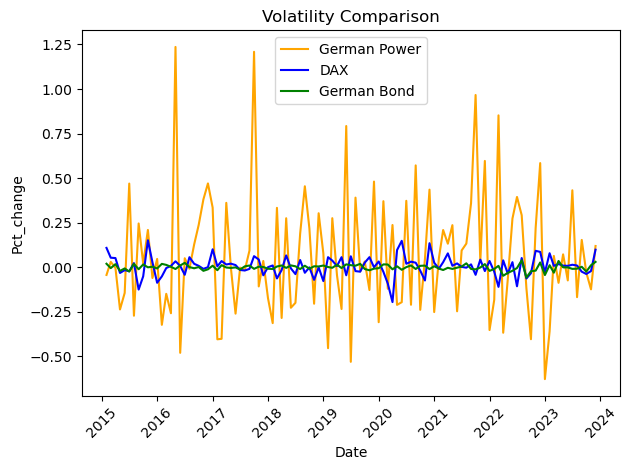

In [21]:
plt.plot(Volcomp['Date'], Volcomp['Weighted_volatility_adj'], label='German Power', color='orange')
plt.plot(Volcomp['Date'], Volcomp['^GDAXI'], label='DAX', color='blue')
plt.plot(Volcomp['Date'], Volcomp['X03G.DE'], label='German Bond', color='green')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Pct_change')
plt.title('Volatility Comparison')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

In [28]:
weighted_volatility_reset.to_csv('output.csv')

In [ ]:
def fixed_effect_model(data, category_column, capture_column, outcome_column, date_component):
    # Extract the specified component from the datetime column
    if date_component == 'year':
        data[date_component] = data['Date'].dt.year
    elif date_component == 'month':
        data[date_component] = data['Date'].dt.month
    elif date_component == 'day':
        data[date_component] = data['Date'].dt.day

    # Add constant and relevant columns to the design matrix
    X = sm.add_constant(data[[capture_column, date_component]])
    y = data[outcome_column]

    # Fit the model using robust linear regression with fixed effects
    model = sm.RLM(y, X).fit()

    # Print the summary of the model
    return model.summary()